In [2]:
import cv2
import numpy as np

In [3]:
from matplotlib import pyplot as plt

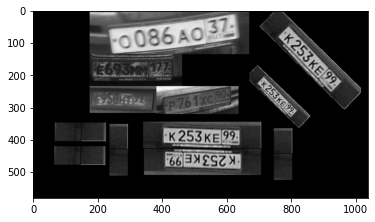

In [5]:
img = cv2.imread('numbers.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')

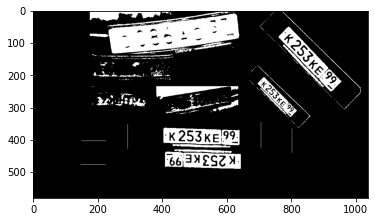

In [50]:
binarised = cv2.threshold(img, 100.0, 255.0, cv2.THRESH_BINARY)[1]
plt.imshow(binarised, cmap='gray')

In [10]:
kernel_2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
kernel_5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

144


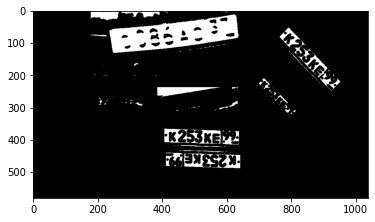

In [54]:
denoise = binarised.copy()
# denoise = cv2.morphologyEx(binarised.copy(), cv2.MORPH_GRADIENT, kernel_5)
denoise = cv2.erode(denoise, kernel_5, iterations=1)
denoise = cv2.erode(denoise, kernel_2, iterations=1)

contours, _ = cv2.findContours(denoise, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
all_coins = len(contours)
print(all_coins)

plt.imshow(denoise, cmap='gray')

196


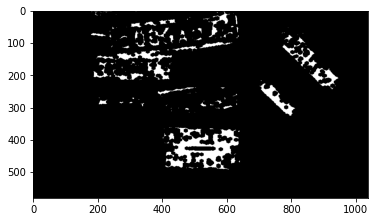

In [44]:
grad_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

grad = cv2.morphologyEx(img.copy(), cv2.MORPH_GRADIENT, grad_kernel)
grad = cv2.threshold(grad, 5.0, 255.0, cv2.THRESH_BINARY)[1]
# grad = cv2.dilate(grad, kernel_5, iterations=1)
grad = cv2.erode(grad, kernel_5, iterations=3)
# grad = cv2.erode(grad, kernel_2, iterations=10)

# grad = cv2.floodFill(grad.copy(), np.zeros((denoised.shape[0] + 2, denoised.shape[1] + 2), np.uint8), (0, 0), 255.0)[1]

contours, _ = cv2.findContours(grad, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
all_coins = len(contours)
print(all_coins)

plt.imshow(grad, cmap='gray')